Plot the sunrise and sunset times for Glasgow winter - am sure there are neater ways of doing this than the code below..... but it works for me.

Uses astral so need to [install that first](https://pypi.org/project/astral/)

* 21-Dec-2021  IGH   Started
* 21-Jun-2022  IGH   Modified for summer solstice

In [1]:
import datetime 
from astral import LocationInfo
from astral.sun import sun
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator
from matplotlib.dates import DayLocator

In [2]:
# Define the city
city = LocationInfo("Glasgow", "Scotland", "Europe/London", 55.8642, -4.2518)

In [3]:
# Let's do this for 45 days, starting Dec 3rd
numdays=40
base = datetime.date(2022, 6, 1)
dates = [base + datetime.timedelta(days=x) for x in range(numdays)]

sunrises=[]
sunsets=[]
for d in dates:
    stemp = sun(city.observer, date=d)
    sunrises.append(stemp["sunrise"])
    sunsets.append(stemp["sunset"])

In [4]:
#  Only really want the time so just can make dates all the same to make the plotting easier
sr=[stemp.replace(year=2022,month=6,day=1) for stemp in sunrises]
ss=[stemp.replace(year=2022,month=6,day=1) for stemp in sunsets]

# And BST so need to add an hour
sr=[stemp + datetime.timedelta(hours=1) for stemp in sr]
ss=[stemp + datetime.timedelta(hours=1) for stemp in ss]

In [5]:
# # Plot them separately to check they look correct
# plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
#                          'font.sans-serif':"Arial",'mathtext.default':"regular"})

# fig,ax = plt.subplots(figsize=(8,4.5))
# plt.plot(dates, sr,color='steelblue')
# ax.yaxis.set_major_locator(MinuteLocator(interval=5))
# ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(DayLocator(interval=7))
# ax.set_ylabel('Time')
# ax.set_xlabel('Date')
# plt.show()

# fig,ax = plt.subplots(figsize=(8,4.5))
# plt.plot(dates,ss,color='firebrick')
# ax.yaxis.set_major_locator(MinuteLocator(interval=5))
# ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(DayLocator(interval=7))
# ax.set_ylabel('Time')
# ax.set_xlabel('Date')
# plt.show()

In [6]:
# Work out the date of earliest sunrise and latest sunset
srt=[stemp.timestamp() for stemp in sr]
idsrmin=np.where(srt == np.amin(srt))[0][0]
sst=[stemp.timestamp() for stemp in ss]
idssmax=np.where(sst == np.amax(sst))[0][0]
print('Earliest Sunrise: ',dates[idsrmin].strftime("%d-%b"),sr[idsrmin].strftime("%H:%M:%S"))
print('Latest Sunset: ',dates[idssmax].strftime("%d-%b"),ss[idssmax].strftime("%H:%M:%S"))

Earliest Sunrise:  18-Jun 04:31:19
Latest Sunset:  24-Jun 22:06:14


In [7]:
# How much daylight each day?
dylght=[ss[i]-sr[i] for i in range(len(dates))]
dylght_hnum=[dd.seconds/3600. for dd in dylght]
# Day with longest daylight
iddymax=np.where(dylght_hnum == np.amax(dylght_hnum))[0][0]
print('Longest day: ',dates[iddymax],' with {0:.2f} hrs'.format(dylght_hnum[iddymax]))

Longest day:  2022-06-21  with 17.57 hrs


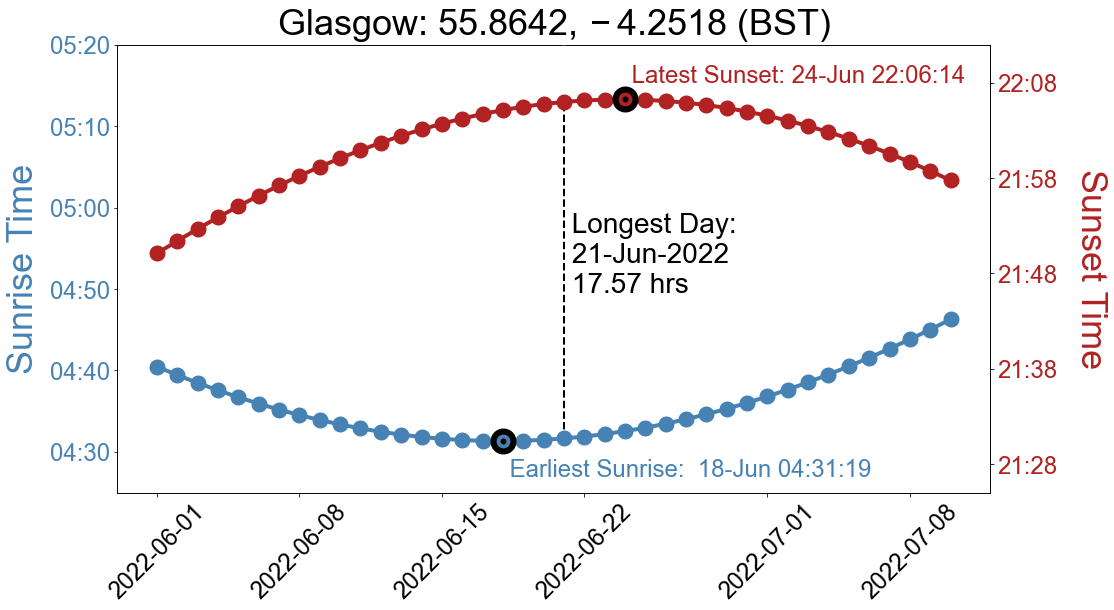

In [8]:
# Now plot them together with different y-axes for sunrise and sunset times

plt.rcParams.update({'font.size': 24,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})
srcl='steelblue'
sscl='firebrick'
fsztit=36

fig,ax = plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('#FFFFFF')
# ax.set_xlabel('Date',fontsize=fsztit)
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%y'))
ax.xaxis.set_major_locator(DayLocator(interval=5))
ax.set_ylabel('Sunrise Time',color=srcl,fontsize=fsztit,labelpad=10)
ax.tick_params(axis='y',labelcolor=srcl)
ax.yaxis.set_major_locator(MinuteLocator(interval=10))
ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
axyr=[datetime.datetime(2022, 6, 1,4,25,0),datetime.datetime(2022, 6, 1,5,20,0)]
ax.set_ylim(axyr)
ax.text(dates[idsrmin],datetime.datetime(2022, 6, 1,4,27,0),\
        " Earliest Sunrise:  "+dates[idsrmin].strftime("%d-%b")+' '+sr[idsrmin].strftime("%H:%M:%S"),color=srcl)
ax.plot([dates[iddymax],dates[iddymax]],[axyr[0],axyr[1]],color='k',lw=2,ls='--')
ax.plot([dates[iddymax],dates[iddymax]],[axyr[0],sr[iddymax]],color='w',lw=4)
ax.plot(dates, sr,'-o',color=srcl,lw=4,mew=10)
ax.plot([dates[idsrmin]],[sr[idsrmin]],'o',color='k',lw=2,mew=20)

ax2=ax.twinx()
ax2.set_ylabel('Sunset Time',color=sscl,fontsize=fsztit,labelpad=50,rotation=-90)
ax2.tick_params(axis='y',labelcolor=sscl)
ax2.yaxis.set_major_locator(MinuteLocator(interval=10))
ax2.yaxis.set_major_formatter(DateFormatter('%H:%M'))
ax2yr=[datetime.datetime(2022, 6, 1,21,25,0),datetime.datetime(2022, 6, 1,22,12,0)]
ax2.set_ylim(ax2yr)
# ax2.plot([dates[iddymax],dates[iddymax]],[ss[iddymax],ax2yr[1]],color='w',lw=4)
ax2.plot([dates[iddymax],dates[iddymax]],[datetime.datetime(2022, 6, 1,22,6),ax2yr[1]],color='w',lw=4)
ax2.plot(dates, ss,'-o',color=sscl,lw=4,mew=10)
ax2.plot([dates[idssmax]],[ss[idssmax]],'o',color='k',lw=2,mew=20)
ax2.text(dates[idssmax],datetime.datetime(2022, 6, 1,22,8,0),\
         " Latest Sunset: "+dates[idssmax].strftime("%d-%b")+' '+ss[idssmax].strftime("%H:%M:%S"),color=sscl)
ax2.text(dates[iddymax],datetime.datetime(2022, 6, 1,21,46,0),\
          " Longest Day: \n 21-Jun-2022 \n {0:.2f} hrs".format(dylght_hnum[iddymax]),color='k',rotation=0, size=28)

plt.title("Glasgow: $55.8642, -4.2518$ (BST)",pad=10,fontsize=fsztit)
fig.tight_layout()
plt.savefig("gla_sunrise_set_summer.png")
plt.show()
